IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Proyecto de Investigación – Terremotos en Chile





In [21]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
ruta = Path('..') / 'data' / 'query_limpio.csv'
df = pd.read_csv(ruta)

In [23]:
df

,Unnamed: 0,level_0,index,latitude,longitude,depth,mag,magType,nst,gap,...,rms,id,horizontalError,depthError,magError,magNst,date,hour,zone,region
0,0,0,0,-30.6105,-71.2446,61.209,4.60,mb,50.0,71.0,...,0.81,us7000qt0p,5.13,5.452,0.109,25.0,2025-09-01,13:48:01,Ovalle,Coquimbo
1,1,1,1,-18.9492,-69.4232,114.517,4.60,mb,53.0,103.0,...,0.98,us7000qs9z,5.16,5.411,0.079,49.0,2025-08-29,21:48:43,Camiña,Tarapacá
2,2,2,2,-21.7142,-68.4897,118.465,4.70,mb,44.0,63.0,...,1.19,us7000qqvr,4.54,5.964,0.060,85.0,2025-08-25,18:01:03,Ollagüe,Antofagasta
3,3,3,3,-19.3888,-69.2674,100.534,5.00,mb,59.0,104.0,...,1.04,us6000r3fa,6.76,5.716,0.029,391.0,2025-08-24,03:44:08,Camiña,Tarapacá
4,4,4,4,-32.5045,-71.5221,53.111,4.70,mb,49.0,133.0,...,0.84,us6000r3as,2.93,5.576,0.097,32.0,2025-08-23,09:07:59,La Ligua,Valparaíso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972,8972,9479,10402,-32.1750,-71.7630,15.000,6.35,mw,NaN,NaN,...,NaN,iscgem610548661,NaN,13.100,0.200,NaN,1906-10-02,14:33:45,La Ligua,Valparaíso
8973,8973,9480,10403,-39.2280,-72.7210,15.000,6.74,mw,NaN,NaN,...,NaN,iscgemsup16957914,NaN,25.000,0.200,NaN,1906-08-19,09:34:08,Loncoche,Araucanía
8974,8974,9481,10404,-32.4000,-71.4000,35.000,8.20,mw,NaN,NaN,...,NaN,iscgemsup16957911,NaN,11.100,0.200,NaN,1906-08-17,00:40:04,Valparaíso,Valparaíso
8975,8975,9482,10405,-32.3120,-73.7060,10.000,6.72,mw,NaN,NaN,...,NaN,iscgemsup610548593,NaN,25.000,0.230,NaN,1904-12-11,17:05:42,Valparaíso,Valparaíso


Cargamos nuestro DataFrame limpio y ahora evaluaremos tomando como variable X los valores de depth: Profundidad del epicentro, rms: Calidad del ajuste, nst: Número de estaciones que reportaron, gap: Brecha azimutal (calidad de localización), latitud, longitud. Como variable Y tomamos mag: magnitud.

In [24]:
X = df[['depth', 'rms', 'nst', 'gap', 'latitude', 'longitude']]

# Limpiamos NaN's
X = X.fillna(X.mean())
y = df['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

# Modelo
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predicciones
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

# Resultados
print('=== Coeficientes ===')
print(f'Intercepto: {linreg.intercept_:.4f}')
for i, col in enumerate(X.columns):
    print(f'{col}: {linreg.coef_[i]:.4f}')

print('\n=== Conjunto de entrenamiento ===')
print(f'R² (train): {r2_score(y_train, y_pred_train):.4f}')
print(f'RMSE (train): {root_mean_squared_error(y_train, y_pred_train):.4f}')

print('\n=== Conjunto de prueba ===')
print(f'R² (test): {r2_score(y_test, y_pred_test):.4f}')
print(f'RMSE (test): {root_mean_squared_error(y_test, y_pred_test):.4f}')

=== Coeficientes ===
Intercepto: 5.5665
depth: -0.0025
rms: 0.1485
nst: 0.0031
gap: -0.0032
latitude: -0.0031
longitude: 0.0096

=== Conjunto de entrenamiento ===
R² (train): 0.1985
RMSE (train): 0.4542

=== Conjunto de prueba ===
R² (test): 0.1934
RMSE (test): 0.4232


Ahora grafiquemos para observar cómo se comportan los datos

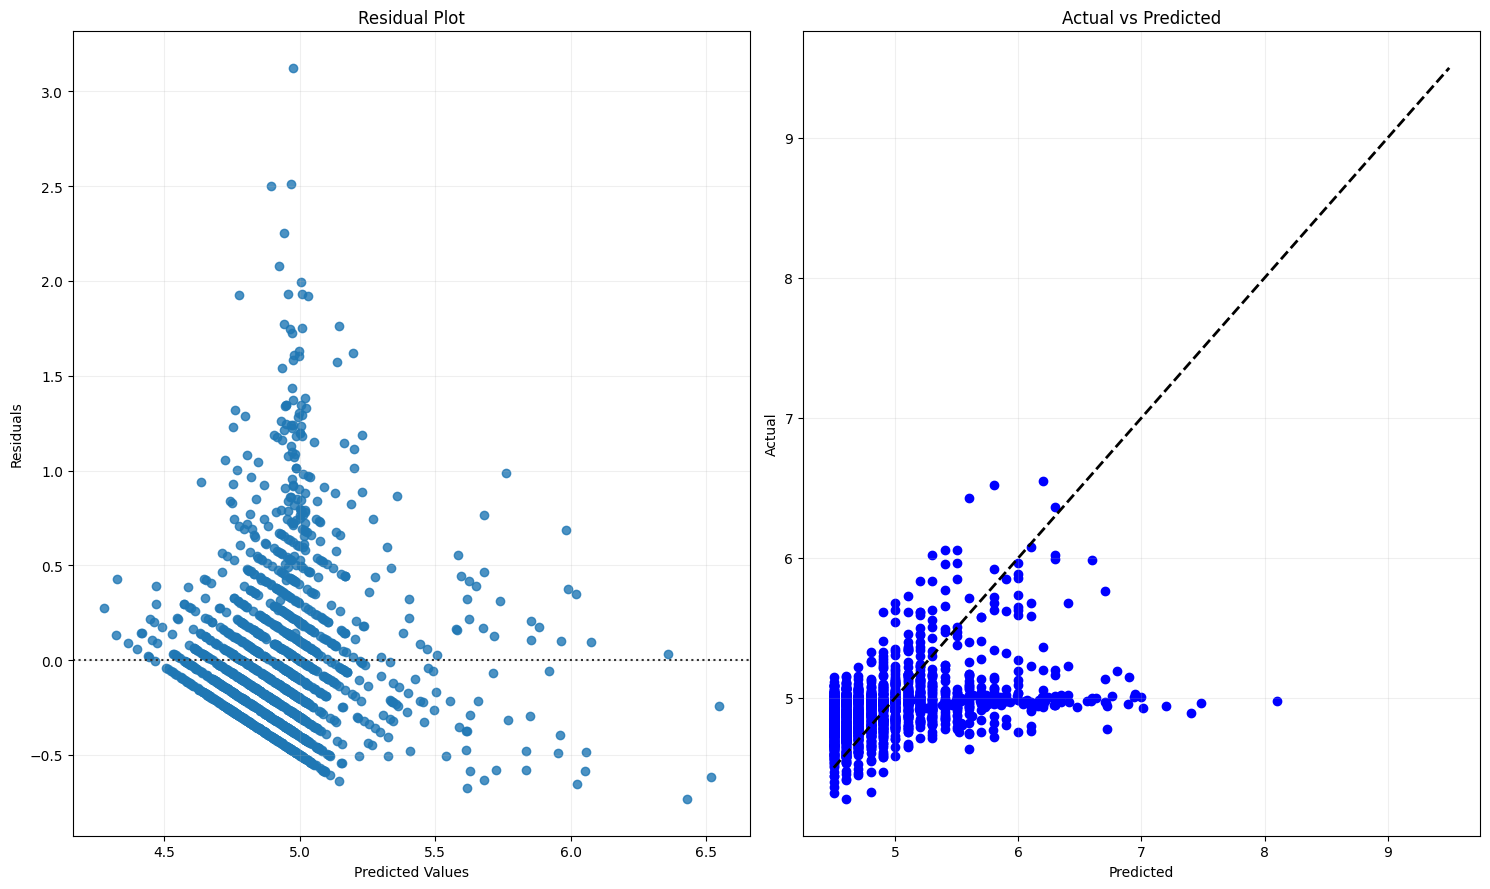

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,2, figsize=(15,9))

sns.residplot(x=y_pred_test, y=y_test - y_pred_test, ax=ax[0])
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Residual Plot")
ax[0].grid(alpha=0.2)

ax[1].scatter(y_test, y_pred_test, color='blue')
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")
ax[1].set_title("Actual vs Predicted")

ax[1].grid(alpha=0.2)
plt.tight_layout()
plt.show()

Ahora observaremos la frecuencia con los datos de mag, depth, latitud, longitude

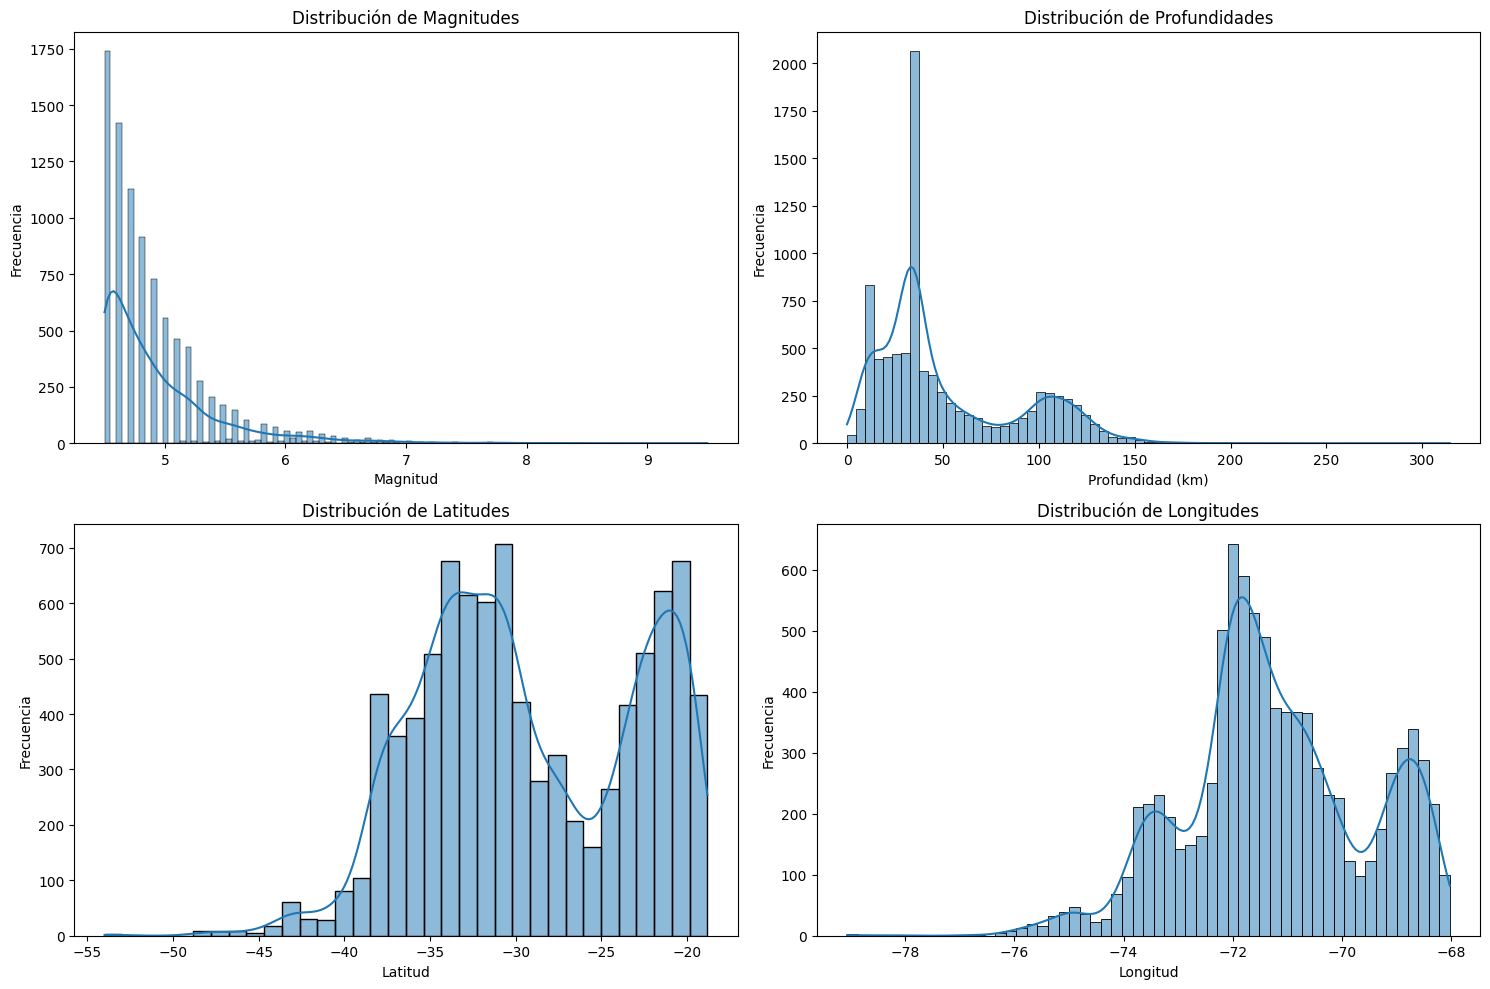

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Magnitud (variable objetivo)
sns.histplot(ax=ax1, data=df, x='mag', kde=True)
ax1.set_xlabel('Magnitud')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Magnitudes')

# Profundidad
sns.histplot(ax=ax2, data=df, x='depth', kde=True)
ax2.set_xlabel('Profundidad (km)')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución de Profundidades')

# Latitud
sns.histplot(ax=ax3, data=df, x='latitude', kde=True)
ax3.set_xlabel('Latitud')
ax3.set_ylabel('Frecuencia')
ax3.set_title('Distribución de Latitudes')

# Longitud
sns.histplot(ax=ax4, data=df, x='longitude', kde=True)
ax4.set_xlabel('Longitud')
ax4.set_ylabel('Frecuencia')
ax4.set_title('Distribución de Longitudes')

plt.tight_layout()
plt.show()

Por último, normalizaremos estos datos para observar cómo varían

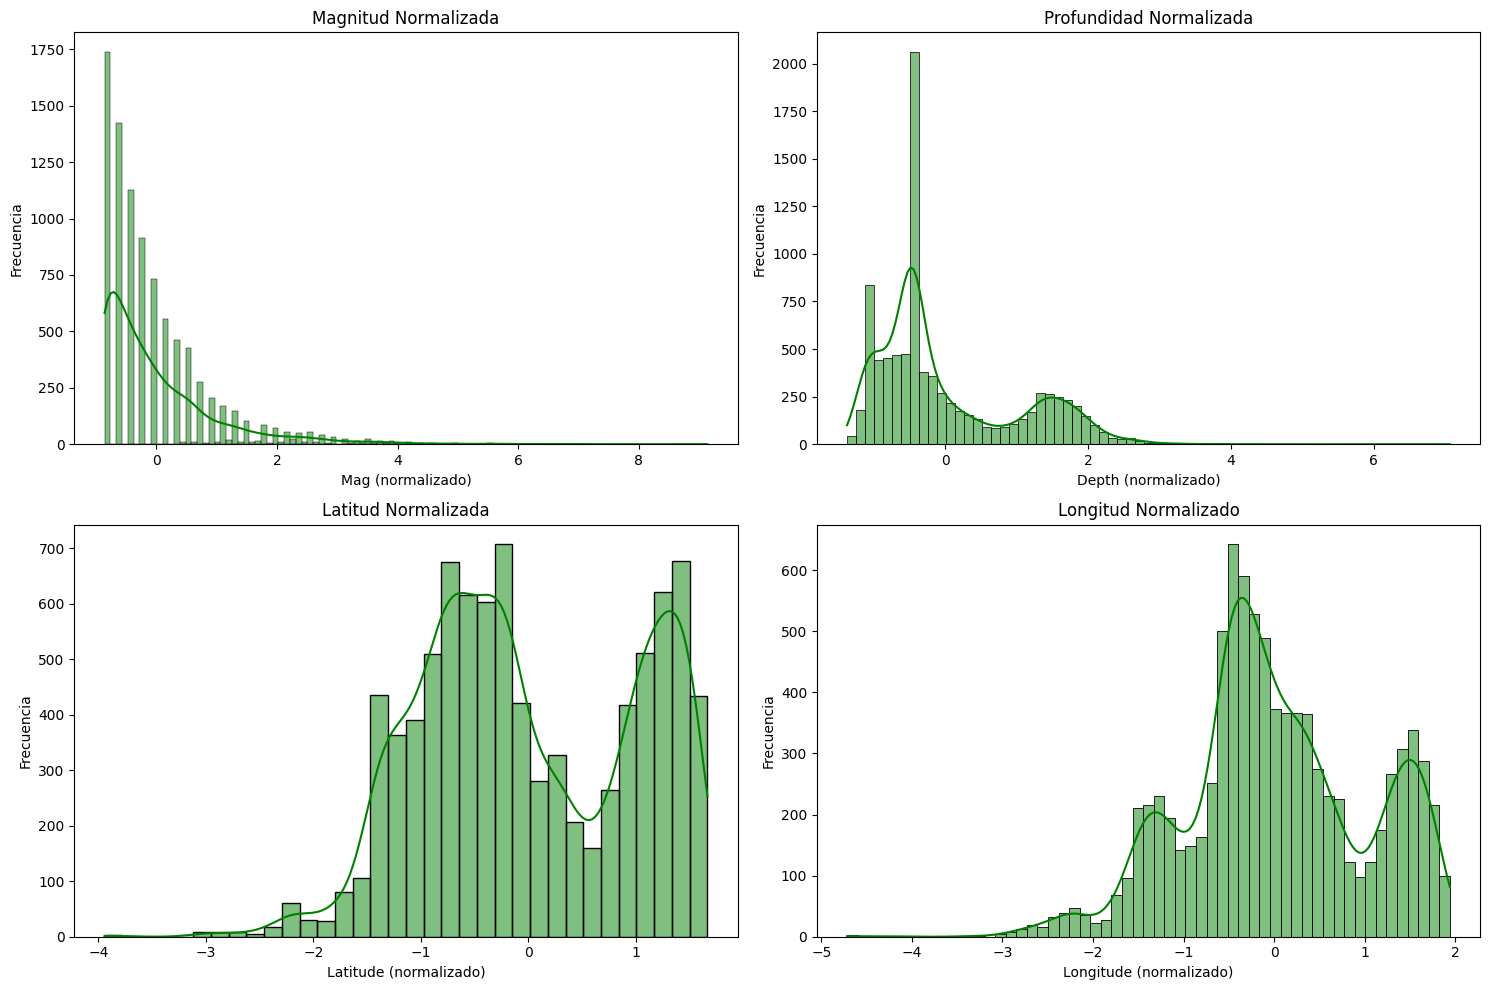

In [27]:
variables = ['mag', 'depth', 'latitude', 'longitude']  # Lista de variables a normalizar
X = df[variables].fillna(df[variables].mean()) #corregimos datos nulos

# Normalización con StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

X_sc_df = pd.DataFrame(X_sc, columns=variables)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ax=ax1, data=X_sc_df, x='mag', kde=True, color='green')
ax1.set_xlabel('Mag (normalizado)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Magnitud Normalizada')

sns.histplot(ax=ax2, data=X_sc_df, x='depth', kde=True, color='green')
ax2.set_xlabel('Depth (normalizado)')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Profundidad Normalizada')

sns.histplot(ax=ax3, data=X_sc_df, x='latitude', kde=True, color='green')
ax3.set_xlabel('Latitude (normalizado)')
ax3.set_ylabel('Frecuencia')
ax3.set_title('Latitud Normalizada')

sns.histplot(ax=ax4, data=X_sc_df, x='longitude', kde=True, color='green')
ax4.set_xlabel('Longitude (normalizado)')
ax4.set_ylabel('Frecuencia')
ax4.set_title('Longitud Normalizado')

plt.tight_layout()
fig.savefig('scaled_sismos.png', dpi=300, bbox_inches='tight')
plt.show()